<a href="https://colab.research.google.com/github/Jgabriel1800/Clientes-mercado/blob/main/Clientes_mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5, AZUL6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5, BRANCO = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
VERMELHO1, VERMELHO2, LARANJA1 = '#C3514E',	'#E6BAB7',	'#F79747'
VERDE1, VERDE2, VERDE3 = '#0C8040',	'#9ABB59', '#9ECCB3'
colors=

In [3]:
df=pd.read_csv('/content/drive/MyDrive/archive (2)/Customers.csv')
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [5]:
df=df.query('Age >=18')
df

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
...,...,...,...,...,...,...,...,...
1995,1996,Female,71,184387,40,Artist,8,7
1996,1997,Female,91,73158,32,Doctor,7,7
1997,1998,Male,87,90961,14,Healthcare,9,2
1998,1999,Male,77,182109,4,Executive,7,2


Analisar a quantidade de homens e mulheres na empresa

In [6]:
df_genero=df.copy()
df_genero=df[['Gender']].value_counts()

df_genero

,count
Gender,
Female,989
Male,679


Gráfico da quantidade de homens e mulheres

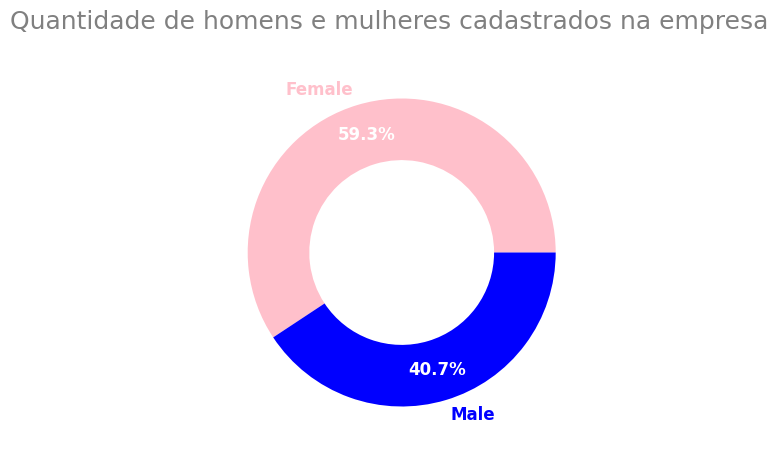

In [7]:
import matplotlib.pyplot as plt
df_genero = df['Gender'].value_counts()
fig, ax = plt.subplots(figsize=(10, 5))

plt.suptitle('Quantidade de homens e mulheres cadastrados na empresa',fontsize=18, color='grey', ha='center')

ptc, text, _ = ax.pie(df_genero, labels=df_genero.index,  autopct='%.1f%%',startangle=0,pctdistance=0.8,  wedgeprops=dict(width=0.4),
textprops=dict(size=12, fontweight='bold', color='white'),colors=['pink', 'blue'])

for t, p in zip(text, ptc):
    t.set_color(p.get_facecolor())

plt.show()


Analisando a distribuição das idades dos homens

In [8]:
df_homem_idade=df.copy()
df_homem_idade = df_homem_idade[df['Gender'] == 'Male'].copy()
df_homem_idade=df_homem_idade[['Gender','Age']]
df_homem_idade=df_homem_idade['Age'].value_counts()
df_homem_idade = df_homem_idade.reset_index()
df_homem_idade=df_homem_idade.rename(columns={'Age':'idade','count':'quantidade'})
df_homem_idade

,idade,quantidade
0,32,13
1,59,13
2,94,12
3,28,12
4,97,12
...,...,...
77,57,4
78,61,4
79,71,4
80,98,2


In [9]:
bins = range(0, 101, 10)
labels = [f'{i}-{i+9}' for i in bins[:-1]]

df_homem_idade['faixa_etaria'] = pd.cut(df_homem_idade['idade'], bins=bins, labels=labels, right=False)


df_homem_idade_agrupado = df_homem_idade.groupby('faixa_etaria')['quantidade'].sum().reset_index()

df_homem_idade_agrupado

<ipython-input-9-da0b78cde768>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_homem_idade_agrupado = df_homem_idade.groupby('faixa_etaria')['quantidade'].sum().reset_index()


,faixa_etaria,quantidade
0,0-9,0
1,10-19,23
2,20-29,93
3,30-39,92
4,40-49,74
5,50-59,73
6,60-69,84
7,70-79,76
8,80-89,86
9,90-99,78


In [10]:
fig = px.bar(
    df_homem_idade_agrupado,
    x='quantidade',
    y='faixa_etaria',
    orientation='h',
    title='Distribuição das idades dos homens',
    labels={},
    text='quantidade',
    color='quantidade',
    color_continuous_scale='Blues'
)

fig.update_traces(textposition='outside', hoverinfo='y+text')

fig.update_layout(
    title={
        'text': "📊 Distribuição das Idades das Mulheres",
        'x': 0.5,
        'xanchor': 'right',
        'yanchor': 'top'
    },
    font=dict(
        family="Arial, sans-serif",
        size=18,
        color=AZUL1
    ),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()


Agora analisar a idade das mulheres

In [11]:
df_mulher_idade=df.copy()
df_mulher_idade=df_mulher_idade[df_mulher_idade['Gender']=='Female']
df_mulher_idade=df_mulher_idade[['Gender','Age']]
df_mulher_idade=df_mulher_idade['Age'].value_counts()
df_mulher_idade=df_mulher_idade.reset_index()
df_mulher_idade=df_mulher_idade.rename(columns={'Age':'idade','count':'quantidade'})
df_mulher_idade

,idade,quantidade
0,31,24
1,52,21
2,30,20
3,54,19
4,34,19
...,...,...
77,73,7
78,26,7
79,94,6
80,74,5


In [12]:
bins=range(0,101,10)
labels=[f'{i}-{i+9}' for i in bins[:-1]]

df_mulher_idade['faixa_etaria']=pd.cut(df_mulher_idade['idade'],bins=bins,labels=labels,right=False)

df_mulher_idade_agrupado=df_mulher_idade.groupby('faixa_etaria')['quantidade'].sum().reset_index()
df_mulher_idade

<ipython-input-12-37c3f88540d3>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,idade,quantidade,faixa_etaria
0,31,24,30-39
1,52,21,50-59
2,30,20,30-39
3,54,19,50-59
4,34,19,30-39
...,...,...,...
77,73,7,70-79
78,26,7,20-29
79,94,6,90-99
80,74,5,70-79


Criando gráfico

In [13]:
fig = px.bar(
    df_mulher_idade_agrupado,
    x='quantidade',
    y='faixa_etaria',
    orientation='h',
    title='Distribuição das idades das mulheres',
    labels={},
    text='quantidade',
    color='quantidade',
    color_continuous_scale='Reds'

)
fig.update_layout(
    title={'text': "📊 Distribuição das Idades das Mulheres",  'x': 0.5,  'xanchor': 'right',  'yanchor': 'top'
    },font=dict(family="Arial, sans-serif", size=18,  color=VERMELHO1
    ),
    plot_bgcolor='white',
    paper_bgcolor='white'
)

fig.update_traces(textposition='outside', hoverinfo='y+text')

fig.update_layout(xaxis_title=None, yaxis_title=None)
fig.show()


Analisar as profissões dos homens

In [14]:
df_homem_profissao=df.copy()
df_homem_profissao=df_homem_profissao[df_homem_profissao['Gender']=='Male']
df_homem_profissao=df_homem_profissao[['Gender','Profession']]
df_homem_profissao=df_homem_profissao['Profession'].value_counts()
df_homem_profissao=df_homem_profissao.reset_index()
df_home_profissao=df_homem_profissao.rename(columns={'Profession':'profissão','count':'quantidade'})
df_homem_profissao

,Profession,count
0,Artist,190
1,Healthcare,117
2,Entertainment,86
3,Engineer,69
4,Doctor,58
5,Executive,55
6,Lawyer,45
7,Marketing,28
8,Homemaker,16


Criando gráfico

In [15]:
def grafico_profissao_homem():
  fig, ax = plt.subplots(figsize=(10, 5))
  plt.suptitle('Distribuição das profissões dos homens', fontsize=18, color='grey', ha='center')
  colors=[AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5]
  ptc, text, _ = ax.pie(
      df_homem_profissao['count'],
      labels=df_homem_profissao['Profession'],
      autopct='%.1f%%',
      startangle=0,
      pctdistance=0.8,
      wedgeprops=dict(width=0.4),
      textprops=dict(size=12, fontweight='bold', color='white'),
      colors=[AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5]
  )





Criando função para escrever estilizado

In [16]:
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas
    canvas.draw()
    renderer = canvas.get_renderer()

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(renderer)
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width, units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

**criando mensagem**

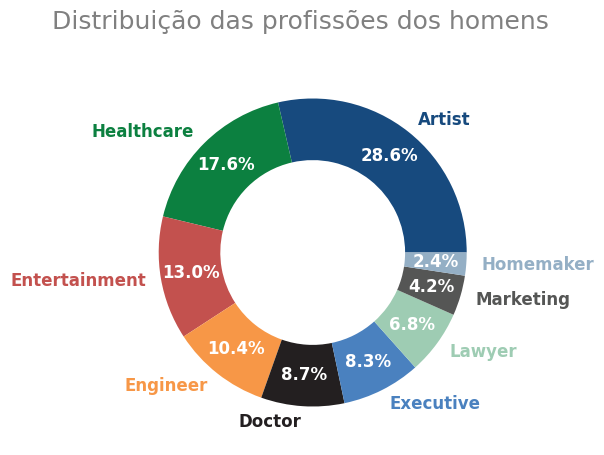

In [17]:

def grafico_profissao_homem():
  fig, ax = plt.subplots(figsize=(10, 5))
  plt.suptitle('Distribuição das profissões dos homens', fontsize=18, color='grey', ha='center')
  colors=[AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5]
  ptc, text, _ = ax.pie(
      df_homem_profissao['count'],
      labels=df_homem_profissao['Profession'],
      autopct='%.1f%%',
      startangle=0,
      pctdistance=0.8,
      wedgeprops=dict(width=0.4),
      textprops=dict(size=12, fontweight='bold', color='white'),
      colors=[AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5]
  )


  for t, p in zip(text, ptc):
      t.set_color(p.get_facecolor())
  return ax,colors

ax,colors=grafico_profissao_homem()

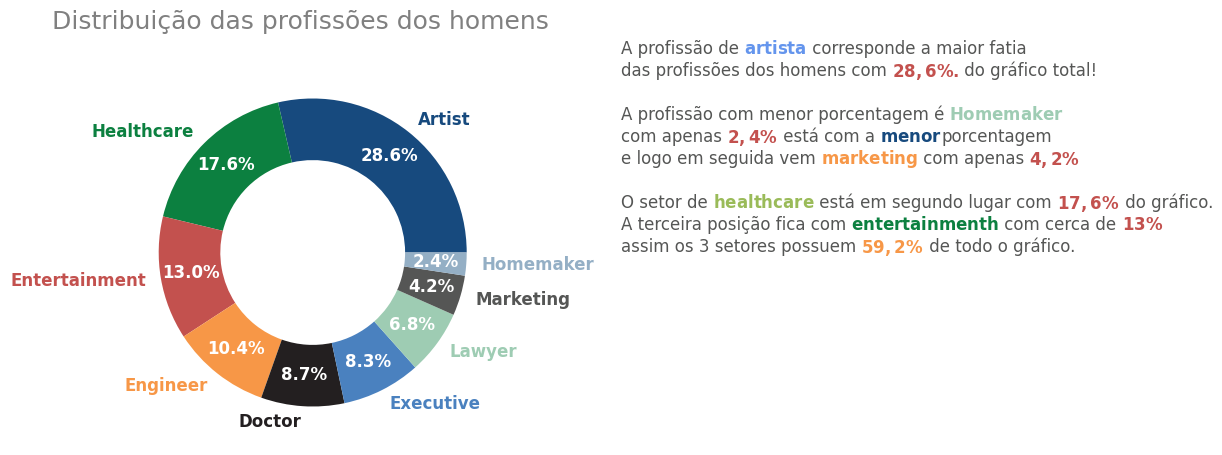

In [18]:
ax,colors=grafico_profissao_homem()

texto_colorido(2,0,'A profissão de ||$\\bf{artista}$|| corresponde a maior fatia\n'
     'das profissões dos homens com ||$\\bf{28,6\%.}$|| do gráfico total!\n'
    '\n'
     'A profissão com menor porcentagem é ||$\\bf{Homemaker}$\n'
     'com apenas ||$\\bf{2,4\%}$|| está com a ||$\\bf{menor }$||porcentagem\n'
     'e logo em seguida vem ||$\\bf{marketing}$|| com apenas ||$\\bf{4,2\%}$||.\n'
     '\n'
     'O setor de ||$\\bf{healthcare}$|| está em segundo lugar com ||$\\bf{17,6\%}$|| do gráfico.\n'
     'A terceira posição fica com ||$\\bf{entertainmenth}$|| com cerca de ||$\\bf{13\%}$||\n'
     'assim os 3 setores possuem ||$\\bf{ 59,2\%}$|| de todo o gráfico.',
 [    [CINZA3, AZUL3, CINZA3],
      [ CINZA3,VERMELHO1,CINZA3],
      [CINZA3,VERMELHO1],
      [CINZA3, VERDE3],
      [CINZA3, VERMELHO1, CINZA3,AZUL1,CINZA3],
      [CINZA3, LARANJA1, CINZA3,VERMELHO1],
      [CINZA3],
      [CINZA3, VERDE2, CINZA3,VERMELHO1,CINZA3],
      [CINZA3, VERDE1, CINZA3,VERMELHO1],
      [CINZA3, LARANJA1, CINZA3]
     ],esp=22,ax=ax,fontsize=12)

gerando o dataframe para as mulheres

In [19]:
df_mulher_profissao = df.copy()
df_mulher_profissao = df_mulher_profissao[df_mulher_profissao['Gender'] == 'Female']
df_mulher_profissao = df_mulher_profissao['Profession'].value_counts().reset_index()
df_mulher_profissao.columns = ['Profession', 'count']
df_mulher_profissao


,Profession,count
0,Artist,324
1,Healthcare,164
2,Entertainment,111
3,Engineer,88
4,Lawyer,73
5,Executive,71
6,Doctor,69
7,Marketing,40
8,Homemaker,34


Gerando o gráfico

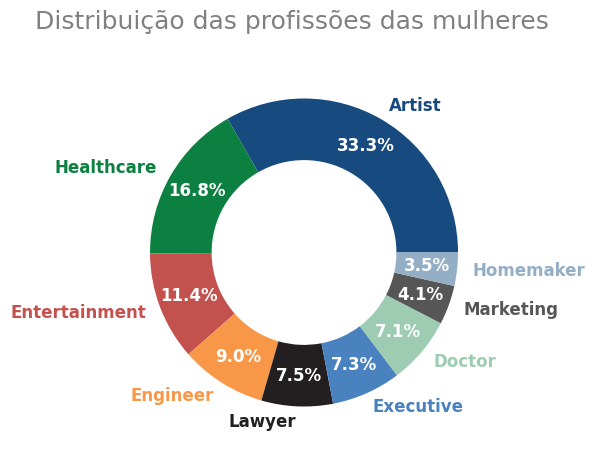

In [20]:
def grafico_profissao_mulher():
  fig, ax = plt.subplots(figsize=(10, 5))
  plt.suptitle('Distribuição das profissões das mulheres', fontsize=18, color='grey', ha='center')
  colors=[AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5]
  ptc, text, _ = ax.pie(
      df_mulher_profissao['count'],
      labels=df_mulher_profissao['Profession'],
      autopct='%.1f%%',
      startangle=0,
      pctdistance=0.8,
      wedgeprops=dict(width=0.4),
      textprops=dict(size=12, fontweight='bold', color='white'),
      colors=[AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5]
  )


  for t, p in zip(text, ptc):
      t.set_color(p.get_facecolor())
  return ax,colors

ax,colors=grafico_profissao_mulher()

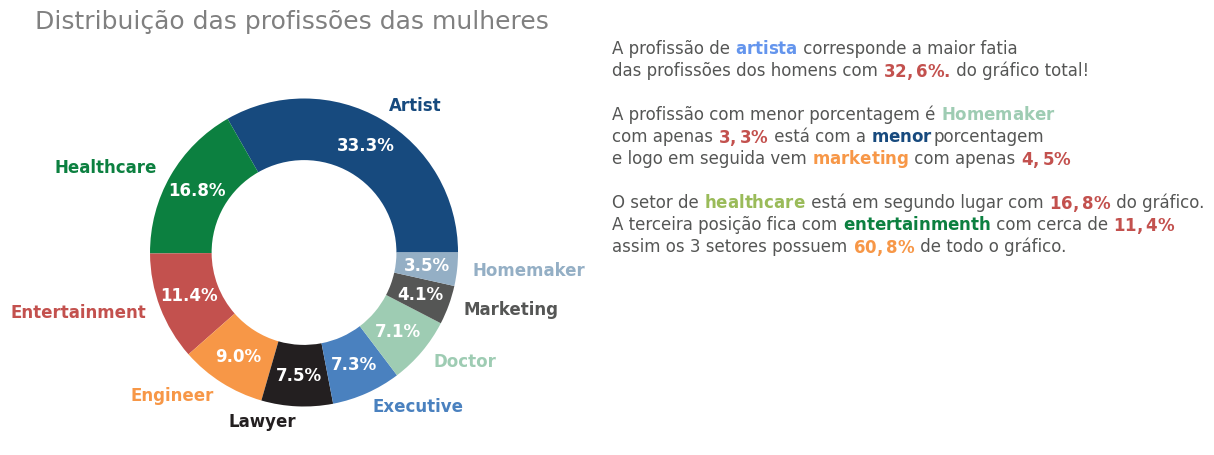

In [21]:
ax,colors=grafico_profissao_mulher()

texto_colorido(2,0,'A profissão de ||$\\bf{artista}$|| corresponde a maior fatia\n'
     'das profissões dos homens com ||$\\bf{32,6\%.}$|| do gráfico total!\n'
    '\n'
     'A profissão com menor porcentagem é ||$\\bf{Homemaker}$\n'
     'com apenas ||$\\bf{3,3\%}$|| está com a ||$\\bf{menor }$||porcentagem\n'
     'e logo em seguida vem ||$\\bf{marketing}$|| com apenas ||$\\bf{4,5\%}$||.\n'
     '\n'
     'O setor de ||$\\bf{healthcare}$|| está em segundo lugar com ||$\\bf{16,8\%}$|| do gráfico.\n'
     'A terceira posição fica com ||$\\bf{entertainmenth}$|| com cerca de ||$\\bf{11,4\%}$||\n'
     'assim os 3 setores possuem ||$\\bf{ 60,8\%}$|| de todo o gráfico.',
 [    [CINZA3, AZUL3, CINZA3],
      [ CINZA3,VERMELHO1,CINZA3],
      [CINZA3,VERMELHO1],
      [CINZA3, VERDE3],
      [CINZA3, VERMELHO1, CINZA3,AZUL1,CINZA3],
      [CINZA3, LARANJA1, CINZA3,VERMELHO1],
      [CINZA3],
      [CINZA3, VERDE2, CINZA3,VERMELHO1,CINZA3],
      [CINZA3, VERDE1, CINZA3,VERMELHO1],
      [CINZA3, LARANJA1, CINZA3]
     ],esp=22,ax=ax,fontsize=12)

Calculando media salarial homem

In [22]:
df_homem_renda = df.copy()
df_homem_renda = df_homem_renda[df_homem_renda['Gender'] == 'Male']
df_homem_renda = df_homem_renda[['Profession', 'Annual Income ($)']]
df_homem_renda = df_homem_renda.groupby('Profession', as_index=False).mean().sort_values(by='Annual Income ($)', ascending=False)
df_homem_renda

,Profession,Annual Income ($)
2,Engineer,113718.811594
3,Entertainment,112834.662791
1,Doctor,112706.431034
7,Lawyer,111736.533333
0,Artist,108056.826316
4,Executive,107341.890909
5,Healthcare,106403.256410
6,Homemaker,104980.187500
8,Marketing,101800.178571


Criando o gráfico da renda dos homens de acordo com o emprego

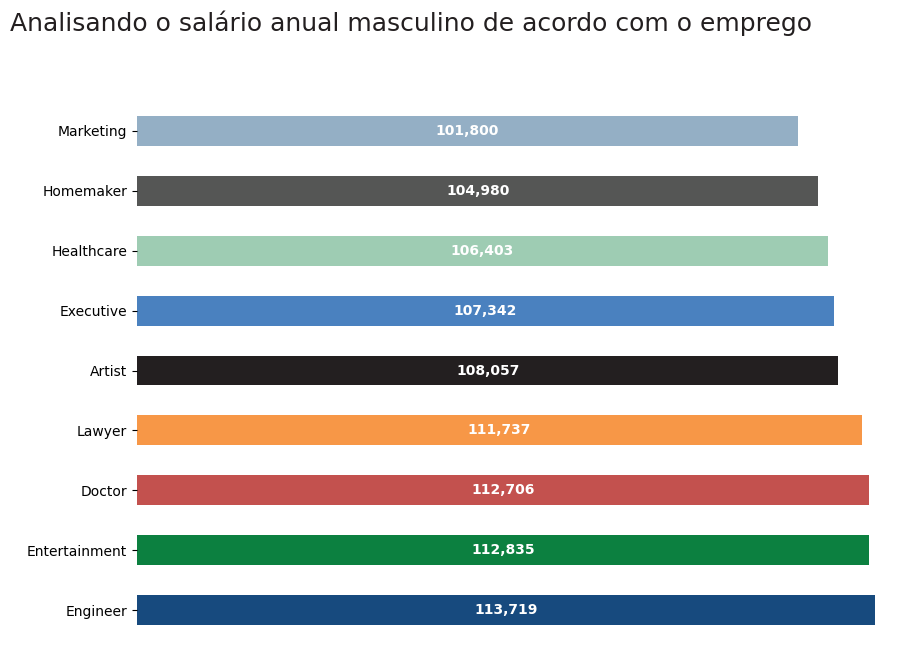

In [23]:
import matplotlib.pyplot as plt
def grafico_homem_renda():
  fig, ax = plt.subplots(figsize=(10, 7))

  colors = [AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5]

  plt.suptitle('Analisando o salário anual masculino de acordo com o emprego',
              fontsize=18, color=CINZA1, ha='right', x=0.8, y=1.01)

  df_homem_renda.plot(kind='barh', x='Profession', y='Annual Income ($)', ax=ax, color=colors, legend=False)

  ax.set_xlabel('')
  ax.set_ylabel("")
  ax.xaxis.set_tick_params()
  ax.set_xticklabels([])
  ax.set_xticks([])
  ax.set_frame_on(False)

  for container in ax.containers:
      labels = [f"{valor.get_width():,.0f}" for valor in container]  # Formatar valores como inteiros
      ax.bar_label(container, label_type='center', labels=labels, size=10, color=BRANCO, fontweight='bold')

  for t, p in zip(text, ptc):
      t.set_color(p.get_facecolor())
  return ax,colors

ax,colors=grafico_homem_renda()



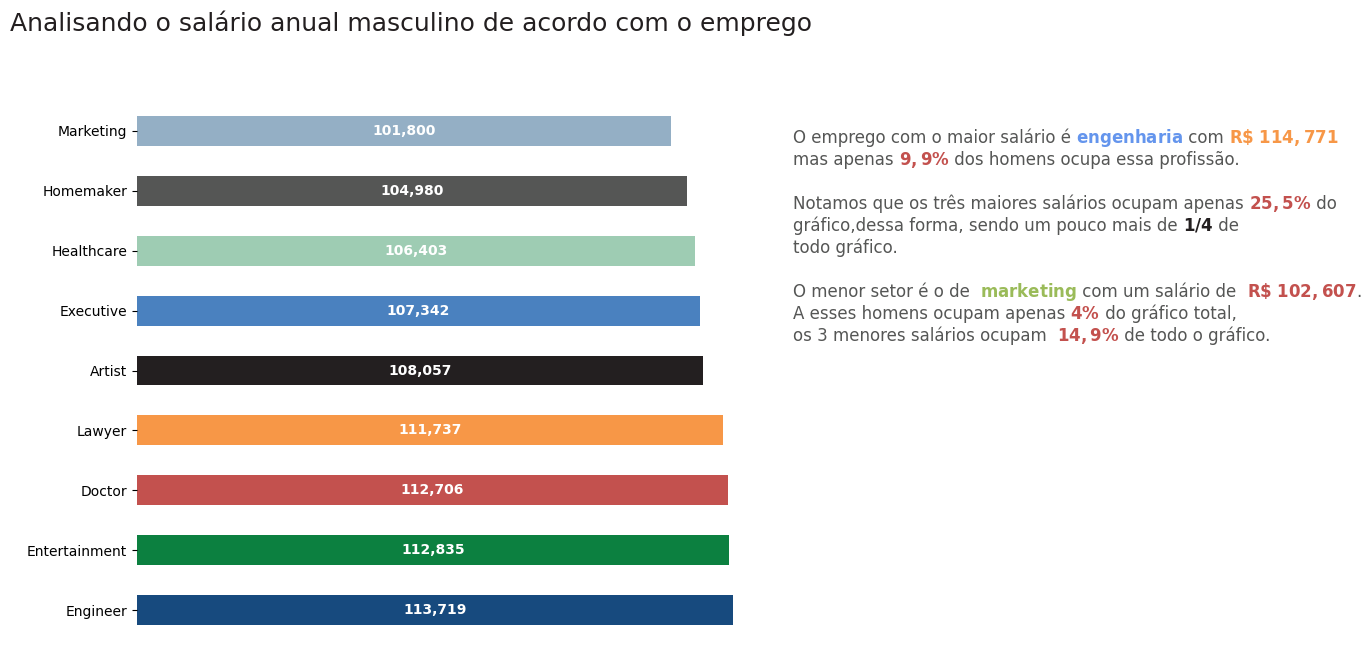

In [24]:

ax, colors = grafico_homem_renda()

ax.set_xlim(0, df_homem_renda['Annual Income ($)'].max() * 1.3)


texto_colorido(
    x=df_homem_renda['Annual Income ($)'].max() * 1.1,
    y=len(df_homem_renda) / 2,
    texto=('O emprego com o maior salário é ||$\\bf{engenharia}$|| com ||$\\bf{R\$\ 114,771}$|| \n'
           'mas apenas ||$\\bf{9,9\%}$|| dos homens ocupa essa profissão.\n'
           '\n'
           'Notamos que os três maiores salários ocupam apenas ||$\\bf{25,5\%}$|| do \n'
           'gráfico,dessa forma, sendo um pouco mais de ||$\\bf{1/4}$|| de \n'
           'todo gráfico.\n'
           '\n'
           'O menor setor é o de  ||$\\bf{marketing}$|| com um salário de  ||$\\bf{R\$\ 102,607}$||.\n'
           'A esses homens ocupam apenas ||$\\bf{4\%}$|| do gráfico total,\n'
           'os 3 menores salários ocupam  ||$\\bf{ 14,9\%}$|| de todo o gráfico.'),
    cores=[
        [CINZA3, AZUL3, CINZA3, LARANJA1],
        [CINZA3, VERMELHO1, CINZA3],
        [CINZA3],
        [CINZA3, VERMELHO1,CINZA3],
        [CINZA3, CINZA1, CINZA3],
        [CINZA3],
        [CINZA3],
        [CINZA3, VERDE2, CINZA3, VERMELHO1, CINZA3],
        [CINZA3, VERMELHO1,CINZA3],
        [CINZA3, VERMELHO1, CINZA3]
    ],
    esp=22, ax=ax, fontsize=12
)

plt.show()


Criando o df da renda das profssiões das mulheres

In [25]:
df_mulher_renda=df.copy()
df_mulher_renda=df_mulher_renda[df_mulher_renda['Gender']=='Female']
df_mulher_renda=df_mulher_renda[['Profession','Annual Income ($)']]
df_mulher_renda=df_mulher_renda.groupby('Profession',as_index=False).mean().sort_values(by='Annual Income ($)',ascending=False)
df_mulher_renda

,Profession,Annual Income ($)
4,Executive,118593.746479
5,Healthcare,111959.042683
2,Engineer,110027.943182
3,Entertainment,108305.315315
1,Doctor,107727.710145
8,Marketing,107143.175000
7,Lawyer,105997.972603
0,Artist,105774.762346
6,Homemaker,105209.823529


criando o gráfico

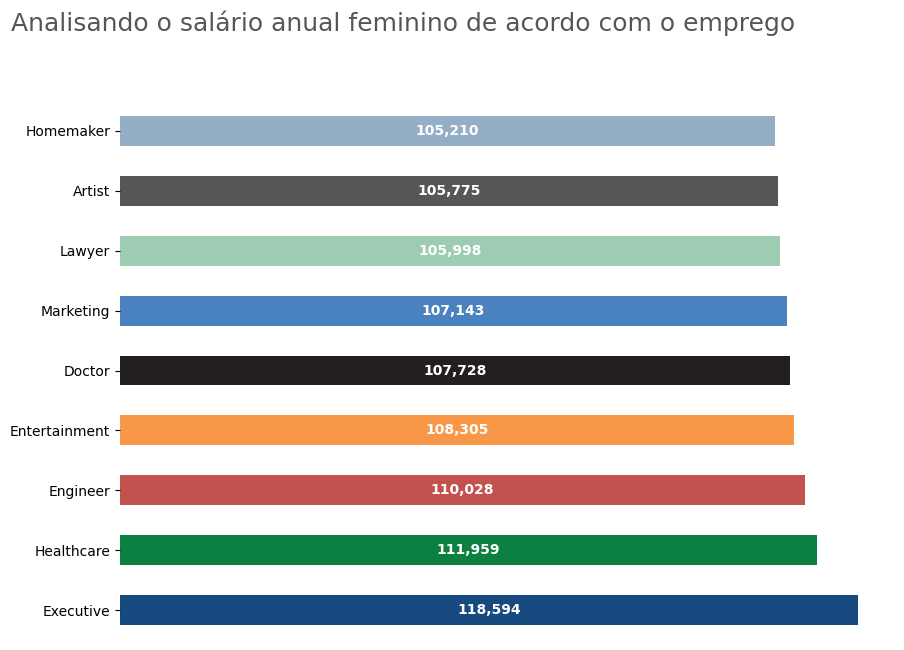

In [26]:
import matplotlib.pyplot as plt
def grafico_mulher_renda():
  fig, ax = plt.subplots(figsize=(10, 7))

  colors = [AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5]

  plt.suptitle('Analisando o salário anual feminino de acordo com o emprego',
              fontsize=18, color=CINZA3, ha='right', x=0.8, y=1.01)


  df_mulher_renda.plot(kind='barh', x='Profession', y='Annual Income ($)', ax=ax, color=colors, legend=False)

  ax.set_xlabel('')
  ax.set_ylabel("")
  ax.xaxis.set_tick_params()
  ax.set_xticklabels([])
  ax.set_xticks([])
  ax.set_frame_on(False)

  for container in ax.containers:
      labels = [f"{valor.get_width():,.0f}" for valor in container]  # Formatar valores como inteiros
      ax.bar_label(container, label_type='center', labels=labels, size=10, color=BRANCO, fontweight='bold')

  for t, p in zip(text, ptc):
      t.set_color(p.get_facecolor())
  return ax,colors

ax,colors=grafico_mulher_renda()

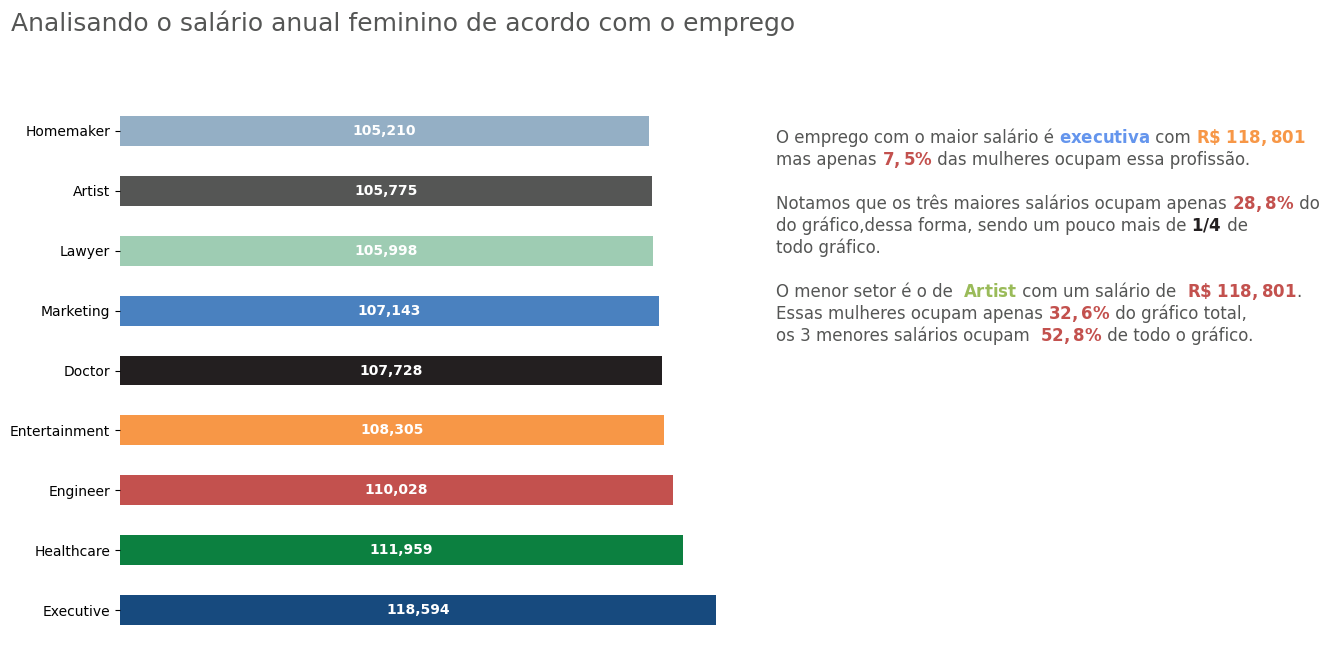

In [27]:

ax, colors = grafico_mulher_renda()

ax.set_xlim(0, df_mulher_renda['Annual Income ($)'].max() * 1.3)


texto_colorido(
    x=df_mulher_renda['Annual Income ($)'].max() * 1.1,
    y=len(df_mulher_renda) / 2,
    texto=('O emprego com o maior salário é ||$\\bf{executiva}$|| com ||$\\bf{R\$\ 118,801}$|| \n'
           'mas apenas ||$\\bf{7,5\%}$|| das mulheres ocupam essa profissão.\n'
           '\n'
           'Notamos que os três maiores salários ocupam apenas ||$\\bf{28,8\%}$|| do\n'
           'do gráfico,dessa forma, sendo um pouco mais de ||$\\bf{1/4}$|| de\n'
           'todo gráfico.\n'
           '\n'
           'O menor setor é o de  ||$\\bf{Artist}$|| com um salário de  ||$\\bf{R\$\ 118,801}$||.\n'
           'Essas mulheres ocupam apenas ||$\\bf{32,6\%}$|| do gráfico total,\n'
           'os 3 menores salários ocupam  ||$\\bf{ 52,8\%}$|| de todo o gráfico.'),
    cores=[
        [CINZA3, AZUL3, CINZA3, LARANJA1],
        [CINZA3, VERMELHO1, CINZA3],
        [CINZA3],
        [CINZA3, VERMELHO1,CINZA3],
        [CINZA3, CINZA1, CINZA3],
        [CINZA3],
        [CINZA3],
        [CINZA3, VERDE2, CINZA3, VERMELHO1, CINZA3],
        [CINZA3, VERMELHO1,CINZA3],
        [CINZA3, VERMELHO1, CINZA3]
    ],
    esp=22, ax=ax, fontsize=12
)


plt.show()

Vamos analisar se o tamanho da familia está compativel com o salario anual e profissão

In [28]:
import pandas as pd

df_familia_salario = df.copy()
df_familia_salario = df_familia_salario[['Annual Income ($)', 'Family Size']]

df_familia_salario = df_familia_salario.groupby('Family Size', as_index=False).mean()
df_familia_salario


,Family Size,Annual Income ($)
0,1,107420.040323
1,2,102282.346405
2,3,102532.935223
3,4,108573.081712
4,5,112629.955157
5,6,117103.656410
6,7,118422.468421
7,8,68000.000000
8,9,30000.000000


Gerando o gráfico

<ipython-input-29-d9961a19b4e9>:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-29-d9961a19b4e9>:30: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



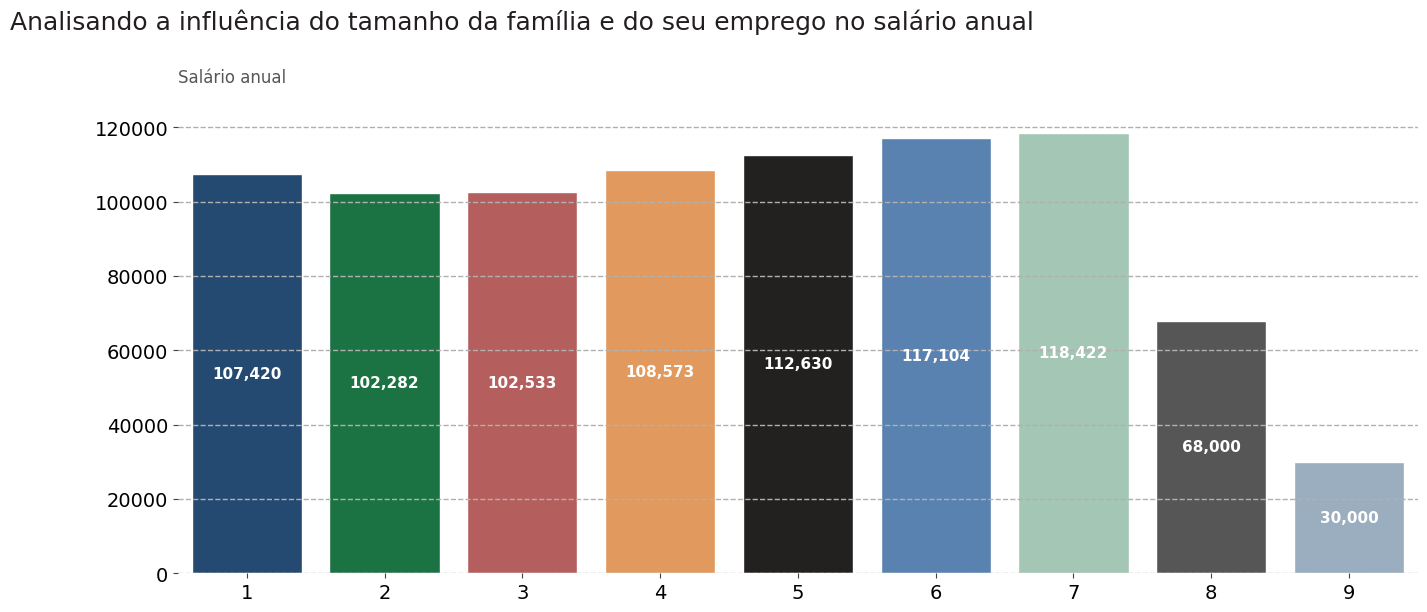

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,6))
sns.set_theme(style='white')

# Definição das cores
colors = [AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5]

# Título do gráfico
fig.suptitle('Analisando a influência do tamanho da família e do seu emprego no salário anual',
             fontsize=18, color=CINZA1, ha='right', x=0.66, y=1.05)


sns.barplot(
    data=df_familia_salario,
    x='Family Size',
    y='Annual Income ($)',
    ax=ax,
    palette=colors
)


ax.set_title('Salário anual\n', color=CINZA3, loc='left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=14, color=CINZA2)
ax.yaxis.set_tick_params(labelsize=14, color=CINZA2)
ax.set_frame_on(False)
ax.legend().remove()
ax.yaxis.grid(linestyle='--', linewidth=1)

for container in ax.containers:
  labels=[f"{valor.get_height():,.0f}" for valor in container]
  ax.bar_label(container,label_type='center',labels=labels,size=11,color=BRANCO,fontweight='bold')

plt.show()

In [30]:
df_familia_salario['salario mensal membro']=(df_familia_salario['Annual Income ($)']/12)/df_familia_salario['Family Size']

df_familia_salario

,Family Size,Annual Income ($),salario mensal membro
0,1,107420.040323,8951.670027
1,2,102282.346405,4261.764434
2,3,102532.935223,2848.137090
3,4,108573.081712,2261.939202
4,5,112629.955157,1877.165919
5,6,117103.656410,1626.439672
6,7,118422.468421,1409.791291
7,8,68000.000000,708.333333
8,9,30000.000000,277.777778


criando o gráfico do salario anual por familia

<ipython-input-31-da91d1f898d6>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-31-da91d1f898d6>:16: UserWarning:

The palette list has more values (10) than needed (9), which may not be intended.

<ipython-input-31-da91d1f898d6>:32: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



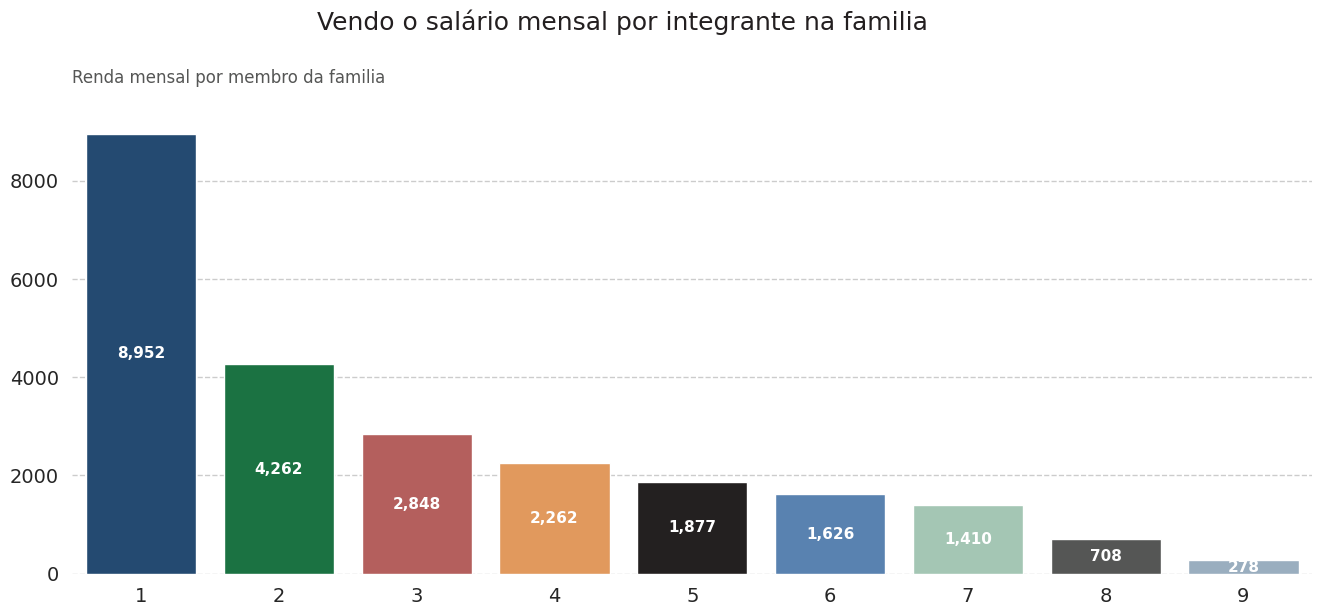

In [31]:
def grafico_familia_salario():
  import matplotlib.pyplot as plt
  import seaborn as sns

  fig, ax = plt.subplots(figsize=(16,6))
  sns.set_theme(style='white')

  # Definição das cores
  colors = [AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5, VERMELHO2]

  # Título do gráfico
  fig.suptitle('Vendo o salário mensal por integrante na familia',
              fontsize=18, color=CINZA1, ha='right', x=0.66, y=1.05)


  sns.barplot(
      data=df_familia_salario,
      x='Family Size',
      y='salario mensal membro',
      ax=ax,
      palette=colors,

  )


  ax.set_title('Renda mensal por membro da familia\n', color=CINZA3, loc='left')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.xaxis.set_tick_params(labelsize=14, color=CINZA2)
  ax.yaxis.set_tick_params(labelsize=14, color=CINZA2)
  ax.set_frame_on(False)
  ax.legend().remove()
  ax.yaxis.grid(linestyle='--', linewidth=1)

  for container in ax.containers:
    labels=[f"{valor.get_height():,.0f}" for valor in container]
    ax.bar_label(container,label_type='center',labels=labels,size=11,color=BRANCO,fontweight='bold')

  plt.show()
  for t, p in zip(text, ptc):
        t.set_color(p.get_facecolor())
  return ax,colors
ax,colors=grafico_familia_salario()

Vamos analisar os anos de experiencia com o salario anual

In [32]:
df_experiencia_salario=df.copy()
df_experiencia_salario=df_experiencia_salario[['Annual Income ($)','Work Experience']]
df_experiencia_salario=df_experiencia_salario.groupby('Work Experience',as_index=False).mean()

df_experiencia_salario

,Work Experience,Annual Income ($)
0,0,104539.924933
1,1,105126.222222
2,2,103320.980392
3,3,109531.382979
4,4,112051.622642
5,5,106657.112150
6,6,114663.166667
7,7,113880.163462
8,8,112870.330709
9,9,113206.077519


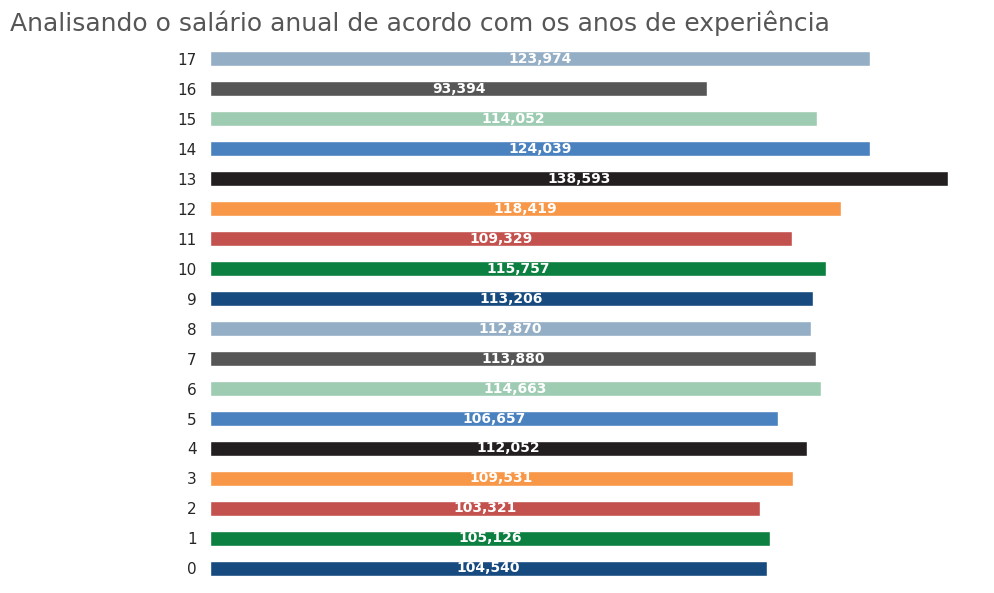

In [33]:
import matplotlib.pyplot as plt

def grafico_experiencia_salario():
    fig, ax = plt.subplots(figsize=(10, 7))
    colors = [AZUL1, VERDE1, VERMELHO1, LARANJA1, CINZA1, AZUL2, VERDE3, CINZA3, AZUL5]

    ax.set_title('Analisando o salário anual de acordo com os anos de experiência',
                 fontsize=18, color=CINZA3, ha='right', x=0.8, y=1.01)

    df_experiencia_salario.plot(kind='barh', x='Work Experience', y='Annual Income ($)', ax=ax, color=colors, legend=False)

    ax.set_xlabel('')
    ax.set_ylabel("")
    ax.xaxis.set_tick_params()
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.set_frame_on(False)

    for container in ax.containers:
        labels = [f"{valor.get_width():,.0f}" for valor in container]
        ax.bar_label(container, label_type='center', labels=labels, size=10, color=BRANCO, fontweight='bold')

    plt.show()
    return ax, colors

ax, colors = grafico_experiencia_salario()


Analisar a relação entre salário e score na loja (clientes com maior poder aquisitivo gastam mais?).

In [68]:
df_score_salario=df.copy()
df_score_salario=df_score_salario[['Annual Income ($)','Spending Score (1-100)']]
df_score_salario=df_score_salario.groupby('Spending Score (1-100)',as_index=False).mean()
df_score_salario.sort_values(by='Annual Income ($)',ascending=False)
df_score_salario

,Spending Score (1-100),Annual Income ($)
0,0,65000.000000
1,1,100495.687500
2,2,110058.800000
3,3,113851.058824
4,4,109035.136364
...,...,...
96,96,112659.619048
97,97,101955.733333
98,98,125026.800000
99,99,106023.062500


Criando o gráfico

In [67]:
import plotly.express as px

fig = px.scatter(
    df_score_salario,
    x='Spending Score (1-100)',
    y='Annual Income ($)',
    color='Spending Score (1-100)',
    size='Annual Income ($)',
    color_continuous_scale='Viridis',
    opacity=0.8,
    title='Relação entre Spending Score e Annual Income')


fig.update_layout(
    template='plotly_white',
    xaxis_title="Spending Score (1-100)",
    yaxis_title="Annual Income ($)",
    yaxis=dict(showticklabels=False,showgrid=False,zeroline=False),
    xaxis=dict(showticklabels=False,showgrid=False,zeroline=False),
    font=dict(family="Arial", size=14),

    coloraxis_colorbar=dict(title=""),
)


fig.show()


In [69]:
df_score_salario_alvo = df_score_salario.query('`Spending Score (1-100)` >= 80')

df_score_salario_alvo

,Spending Score (1-100),Annual Income ($)
80,80,132633.111111
81,81,105486.695652
82,82,113433.384615
83,83,116182.315789
84,84,125099.882353
85,85,112061.600000
86,86,107793.307692
87,87,105956.047619
88,88,95598.937500
89,89,112937.285714


Gráfico do público alvo

In [64]:
import plotly.express as px

fig = px.scatter(
    df_score_salario_alvo,
    x='Spending Score (1-100)',
    y='Annual Income ($)',
    color='Spending Score (1-100)',
    size='Annual Income ($)',
    color_continuous_scale='turbo',
    opacity=0.8,
    title='Público alvo com os maiores scores e seus salários')


fig.update_layout(
    template='plotly_white',
    xaxis_title="Spending Score (1-100)",
    yaxis_title="Annual Income ($)",
    yaxis=dict(showgrid=False,zeroline=False),
    xaxis=dict(showgrid=False,zeroline=False),
    font=dict(family="Arial", size=14),

    coloraxis_colorbar=dict(title="score"),
)



fig.show()

In [62]:
import plotly.express as px
import pandas as pd

df_score_salario = df.copy()
df_score_salario = df_score_salario[df_score_salario['Annual Income ($)'] >= 50000]

bins_salario = [50000, 75000, 100000, 150000, 200000]
labels_salario = ['50k-75k', '75k-100k', '100k-150k', '150k-200k']

df_score_salario['Salary Group'] = pd.cut(df_score_salario['Annual Income ($)'], bins=bins_salario, labels=labels_salario, right=False)
df_faixa_salario_scores = df_score_salario.groupby('Salary Group')['Spending Score (1-100)'].mean().reset_index()

fig = px.bar(
    df_faixa_salario_scores,
    x='Salary Group',
    y='Spending Score (1-100)',
    title='Média de Spending Score por Faixa Salarial (A partir de 50k)',
    labels={'Spending Score (1-100)': 'Média de Spending Score'},
    color='Salary Group',
    text_auto='.2f'
)

fig.update_traces(
    textfont=dict(size=12, color='white'),
    textposition='outside'
)

fig.update_layout(
    template='plotly_white',
    xaxis_title="Faixa Salarial",
    yaxis_title="Média Spending Score",
    xaxis=dict(showgrid=False, zeroline=False),
    yaxis=dict(showgrid=False, zeroline=False),
    font=dict(family="Arial", size=14)
)

fig.show()


<ipython-input-62-29c4a0ec171b>:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**Analisamos que os maiores scores tem um salário anual a partir de 95.598 reais e o maior sendo de 132.633 reais.O grupo que ganha entre 150k-200k tem o maior score de todos, mas os que ganham entre 75k-100k são os com menores scores, ficando atrás do grupo 50k-75k**

Identificar quais faixas etárias possuem melhores scores na loja.

In [39]:
df_scores_idade=df.copy()
df_scores_idade=df_scores_idade[['Age','Spending Score (1-100)']]
df_scores_idade=df_scores_idade.groupby('Age',as_index=False).mean()
df_scores_idade

,Age,Spending Score (1-100)
0,18,48.217391
1,19,53.240000
2,20,48.111111
3,21,43.173913
4,22,52.777778
...,...,...
77,95,42.904762
78,96,48.545455
79,97,57.636364
80,98,47.000000


Gerando o gráfico

In [59]:
import plotly.express as px

fig = px.scatter(
    df_scores_idade,
    x='Spending Score (1-100)',
    y='Age',
    color='Spending Score (1-100)',
    size='Spending Score (1-100)',
    color_continuous_scale='plasma',
    opacity=0.8,
    title='Relação das idades com o score na empresa')


fig.update_layout(
    template='plotly_white',
    xaxis_title="Spending Score (1-100)",
    yaxis_title="Idade",
    yaxis=dict(showgrid=False,zeroline=False),
    xaxis=dict(showgrid=False,zeroline=False),
    font=dict(family="Arial", size=14),

    coloraxis_colorbar=dict(title="Score"),
)


fig.show()

analisar os melhores scores em relação a idade

In [41]:
df_scores_idade_alvo=df_scores_idade.query('`Spending Score (1-100)` >= 55' and 'Age>=18')

df_scores_idade_alvo

,Age,Spending Score (1-100)
0,18,48.217391
1,19,53.240000
2,20,48.111111
3,21,43.173913
4,22,52.777778
...,...,...
77,95,42.904762
78,96,48.545455
79,97,57.636364
80,98,47.000000


Gerando o gráfico

In [42]:
import plotly.express as px

fig = px.scatter(
    df_scores_idade_alvo,
    x='Spending Score (1-100)',
    y='Age',
    color='Spending Score (1-100)',
    size='Spending Score (1-100)',
    color_continuous_scale='YlGnBu',
    opacity=0.8,
    title='Relação das idades com o score na empresa')


fig.update_layout(
    template='plotly_white',
    xaxis_title="Spending Score (1-100)",
    yaxis_title="Idade",
    yaxis=dict(showticklabels=False,showgrid=False,zeroline=False),
    xaxis=dict(showticklabels=False,showgrid=False,zeroline=False),
    font=dict(family="Arial", size=14),

    coloraxis_colorbar=dict(title=""),
)

fig.show()



In [43]:
import plotly.express as px

bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

df_scores_idade['Age Group'] = pd.cut(df_scores_idade['Age'], bins=bins, labels=labels, right=False)

df_scores_idade_alvo = df_scores_idade.query('`Spending Score (1-100)` >= 55 and Age >= 18')

df_faixa_scores = df_scores_idade_alvo.groupby('Age Group')['Spending Score (1-100)'].mean().reset_index()

fig = px.bar(
    df_faixa_scores,
    x='Age Group',
    y='Spending Score (1-100)',
    color='Age Group',
    text_auto='.2f',
    title='Analisando o grupo com o Spending Score mais alto por faixa etária',
    labels={'Spending Score (1-100)': 'Média Spending Score'},
    color_discrete_sequence=px.colors.sequential.YlGnBu
)

fig.update_traces(
    textfont=dict(size=12, color='white'),
    textposition='outside' )

fig.update_layout(
    template='plotly_white',
    xaxis_title="Faixa Etária",
    yaxis_title="Média Spending Score",
    yaxis=dict(showgrid=True, zeroline=False),
    xaxis=dict(showgrid=True, zeroline=False),
    font=dict(family="Arial", size=14),
    coloraxis_colorbar=dict(title=""),
)

fig.show()


<ipython-input-43-3f067639e2d1>:10: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



**O grupo com maior score é entre 26-35 anos, já o com menor score é o de 36-45 anos**

Relacionar a profissão com o score na loja (algumas profissões gastam mais?).

In [44]:
df_profissao_score=df.copy()
df_profissao_score=df_profissao_score[['Profession','Spending Score (1-100)']]
df_profissao_score=df_profissao_score.groupby('Profession',as_index=False).mean()
df_profissao_score

,Profession,Spending Score (1-100)
0,Artist,52.247082
1,Doctor,48.937008
2,Engineer,49.012739
3,Entertainment,52.461929
4,Executive,49.047619
5,Healthcare,49.807829
6,Homemaker,44.900000
7,Lawyer,48.491525
8,Marketing,48.970588


In [70]:
import plotly.express as px


df_profissao_score['Label'] = df_profissao_score.apply(lambda row: f"{row['Profession']}<br><b>Score:</b> {round(row['Spending Score (1-100)'], 2)}", axis=1)

fig = px.scatter(
    df_profissao_score,
    x='Profession',
    y='Spending Score (1-100)',
    color='Spending Score (1-100)',
    size='Spending Score (1-100)',
    color_continuous_scale='Cividis',
    opacity=0.8,
    title='Relação das profissões com o score',
    text='Label'
)

fig.update_traces(
    textposition="top center",
    textfont=dict(
        family="Arial",
        size=10,
        color="black"
    ),
    marker=dict(line=dict(width=0))
)

fig.update_layout(
    template='plotly_white',
    xaxis_title="",
    yaxis_title="Spending Score (1-100)",
    xaxis=dict(
        showgrid=False,
        zeroline=False,
        showticklabels=False
    ),
    yaxis=dict(showgrid=False, zeroline=False),
    font=dict(family="Arial", size=12),
    coloraxis_colorbar=dict(title="Score"),
    margin=dict(l=40, r=40, t=40, b=120)
)

fig.show()


**Profissão de artista e entreterimento são as que possuem os maiores scores.Já a profissão com o menor score é dono(a) de casa**

Identificar perfis de clientes por tamanho da família (clientes com famílias maiores têm hábitos de compra diferentes?).

In [46]:
df_familia_score=df.copy()
df_familia_score=df_familia_score[['Family Size','Spending Score (1-100)']]
df_familia_score=df_familia_score.groupby('Family Size',as_index=False).mean()
df_familia_score

,Family Size,Spending Score (1-100)
0,1,48.983871
1,2,50.313725
2,3,51.392713
3,4,52.038911
4,5,51.627803
5,6,49.302564
6,7,48.163158
7,8,32.000000
8,9,17.000000


In [57]:
import plotly.express as px

fig = px.scatter(
    df_familia_score,
    x='Family Size',
    y='Spending Score (1-100)',
    color='Spending Score (1-100)',
    size='Spending Score (1-100)',
    color_continuous_scale='Jet',
    opacity=0.8,
    title='Relação dos integrantes da família com o score')


fig.update_layout(
    template='plotly_white',
    xaxis_title="Integrantes família",
    yaxis_title="Spending Score (1-100)",

    font=dict(family="Arial", size=14),

    coloraxis_colorbar=dict(title=""),
)

fig.show()

Observamos que o topo do score são familias com 4 integrantes. Porém nota-se que a partir do sexto integrante o score caí drasticamente

**Criando clusters de clientes com base em salário e score na loja (clientes premium, médios e de baixo consumo).**

In [54]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans


df_cluster_salario_score = df[['Annual Income ($)', 'Spending Score (1-100)']]


kmeans = KMeans(n_clusters=3, random_state=42)
df_cluster_salario_score['Cluster'] = kmeans.fit_predict(df_cluster_salario_score)


cluster_labels = {0: 'Premium', 1: 'Baixo consumo', 2: 'Médio'}
df_cluster_salario_score['Segmento'] = df_cluster_salario_score['Cluster'].map(cluster_labels)


fig = px.scatter(
    df_cluster_salario_score,
    x='Annual Income ($)',
    y='Spending Score (1-100)',
    color='Segmento',
    title='Clusters de Clientes com Base em Salário e Spending Score',
    labels={'Annual Income ($)': 'Salário Anual', 'Spending Score (1-100)': 'Spending Score'},
    color_discrete_map={'Premium': '#1f77b4', 'Médio': '#ff7f0e', 'Baixo Consumo': '#2ca02c'},
    template='plotly_white'
)
fig.update_layout(
    yaxis=dict( showgrid=False, zeroline=False),
    xaxis=dict( showgrid=False, zeroline=False)
)


fig.show()


<ipython-input-54-98a75f48b24a>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-54-98a75f48b24a>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:

df_segmentos = df_cluster_salario_score['Segmento'].value_counts().reset_index()

df_segmentos.columns = ['Segmento', 'Quantidade']

print(df_segmentos)


        Segmento  Quantidade
0          Médio         611
1        Premium         568
2  Baixo consumo         489


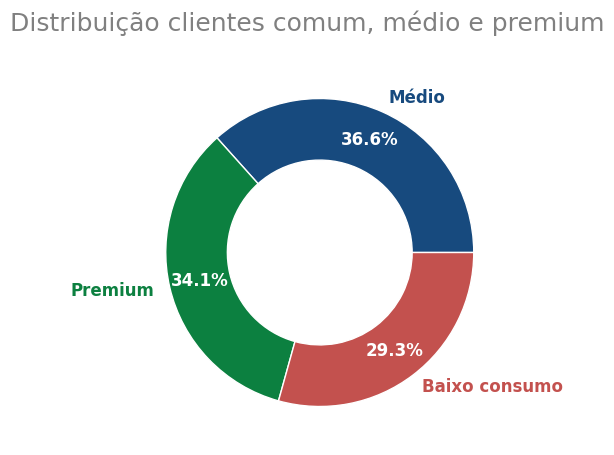

In [82]:
import matplotlib.pyplot as plt
cores=[AZUL1,VERDE1,VERMELHO1]
fig, ax = plt.subplots(figsize=(10, 5))

plt.suptitle('Distribuição clientes comum, médio e premium',fontsize=18, color='grey', ha='center')

ptc, text, _ = ax.pie(
    df_segmentos['Quantidade'],
    labels=df_segmentos['Segmento'],
    autopct='%.1f%%',
    startangle=0,
    pctdistance=0.8,
    wedgeprops=dict(width=0.4),
    textprops=dict(size=12, fontweight='bold', color='white'),
    colors=cores
)


for t, p in zip(text, ptc):
    t.set_color(p.get_facecolor())

plt.show()

**Baixo consumo:Esses clientes tendem a ter salários mais baixos.**

**Médio:Esse grupo é composto por clientes com salários intermediários.**

**Premium:Este grupo de clientes tem salários mais altos.**

Identificar clientes de alto valor (com alto score e poder aquisitivo) para campanhas personalizadas.

In [49]:
df_score_renda_alta = df.copy()
df_score_renda_alta = df_score_renda_alta[['Annual Income ($)', 'Spending Score (1-100)']]
df_score_renda_alta = df_score_renda_alta.query('`Spending Score (1-100)` >= 80 and `Annual Income ($)` >= 130000')
df_score_renda_alta


,Annual Income ($),Spending Score (1-100)
273,143000,99
286,140000,84
300,153787,100
317,183217,91
340,173185,99
...,...,...
1958,142502,97
1963,146970,90
1964,182176,96
1971,140263,88


In [53]:
import plotly.express as px

fig = px.scatter(
    df_score_renda_alta,
    x='Spending Score (1-100)',
    y='Annual Income ($)',
    color='Annual Income ($)',
    size='Annual Income ($)',
    color_continuous_scale='pubu',
    opacity=0.8,
    title='Relação das profissões com o score')


fig.update_layout(
    template='plotly_white',
    xaxis_title="	Spending Score (1-100)",
    yaxis_title="Annual Income ($)",
    yaxis=dict(showgrid=False,zeroline=False),
    xaxis=dict(showgrid=False,zeroline=False),
    font=dict(family="Arial", size=14),

    coloraxis_colorbar=dict(title=""),
)

fig.show()

**Conseguimos analisar 127 potênciais clientes que podem ser nosso clientes premium**